In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline
import sys, os
import pandas as pd
import matplotlib.pyplot as plot
import copy
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
#lista con las 10 fuerzas con mas registros de crimenes
topForces = ["metropolitan","greater-manchester","west-yorkshire","west-midlands","south-yorkshire","hampshire","lancashire","thames-valley","kent","avon-and-somerset"]

#lista para guardar los registro de crimenes de las fuerza en los 84 meses
topForcesCrimes = [0] * len(topForces)
for i in range(len(topForces)):
    topForcesCrimes[i] = [0] * 84
    


In [3]:
#variable para ir cambiando de mes
l=0

#ciclo para abrir los archivos año por año
for i in ["2011-","2012-","2013-","2014-","2015-","2016-","2017-"]:
    #ciclo para abrir los archivos mes por mes
    for j in ["01","02","03","04","05","06","07","08","09","10","11","12"]:
        #ciclo para abrir los archivos fuerza por fuerza 
        for k in range(len(topForces)):
            
            #abrimos el archivo mediantes pandas para obtener un dataframe
            dataset = pd.read_csv("./CrimesUK_2011_2017/"+i+j+"/"+i+j+"-"+topForces[k]+"-street.csv", header=0)
            
            #contamos el numero de linea del dataframe y lo sumamos a la fuerza en su mes y año correspondiente
            topForcesCrimes[k][l] += len(dataset)
        l += 1


# Grafica De La Pregunta 11

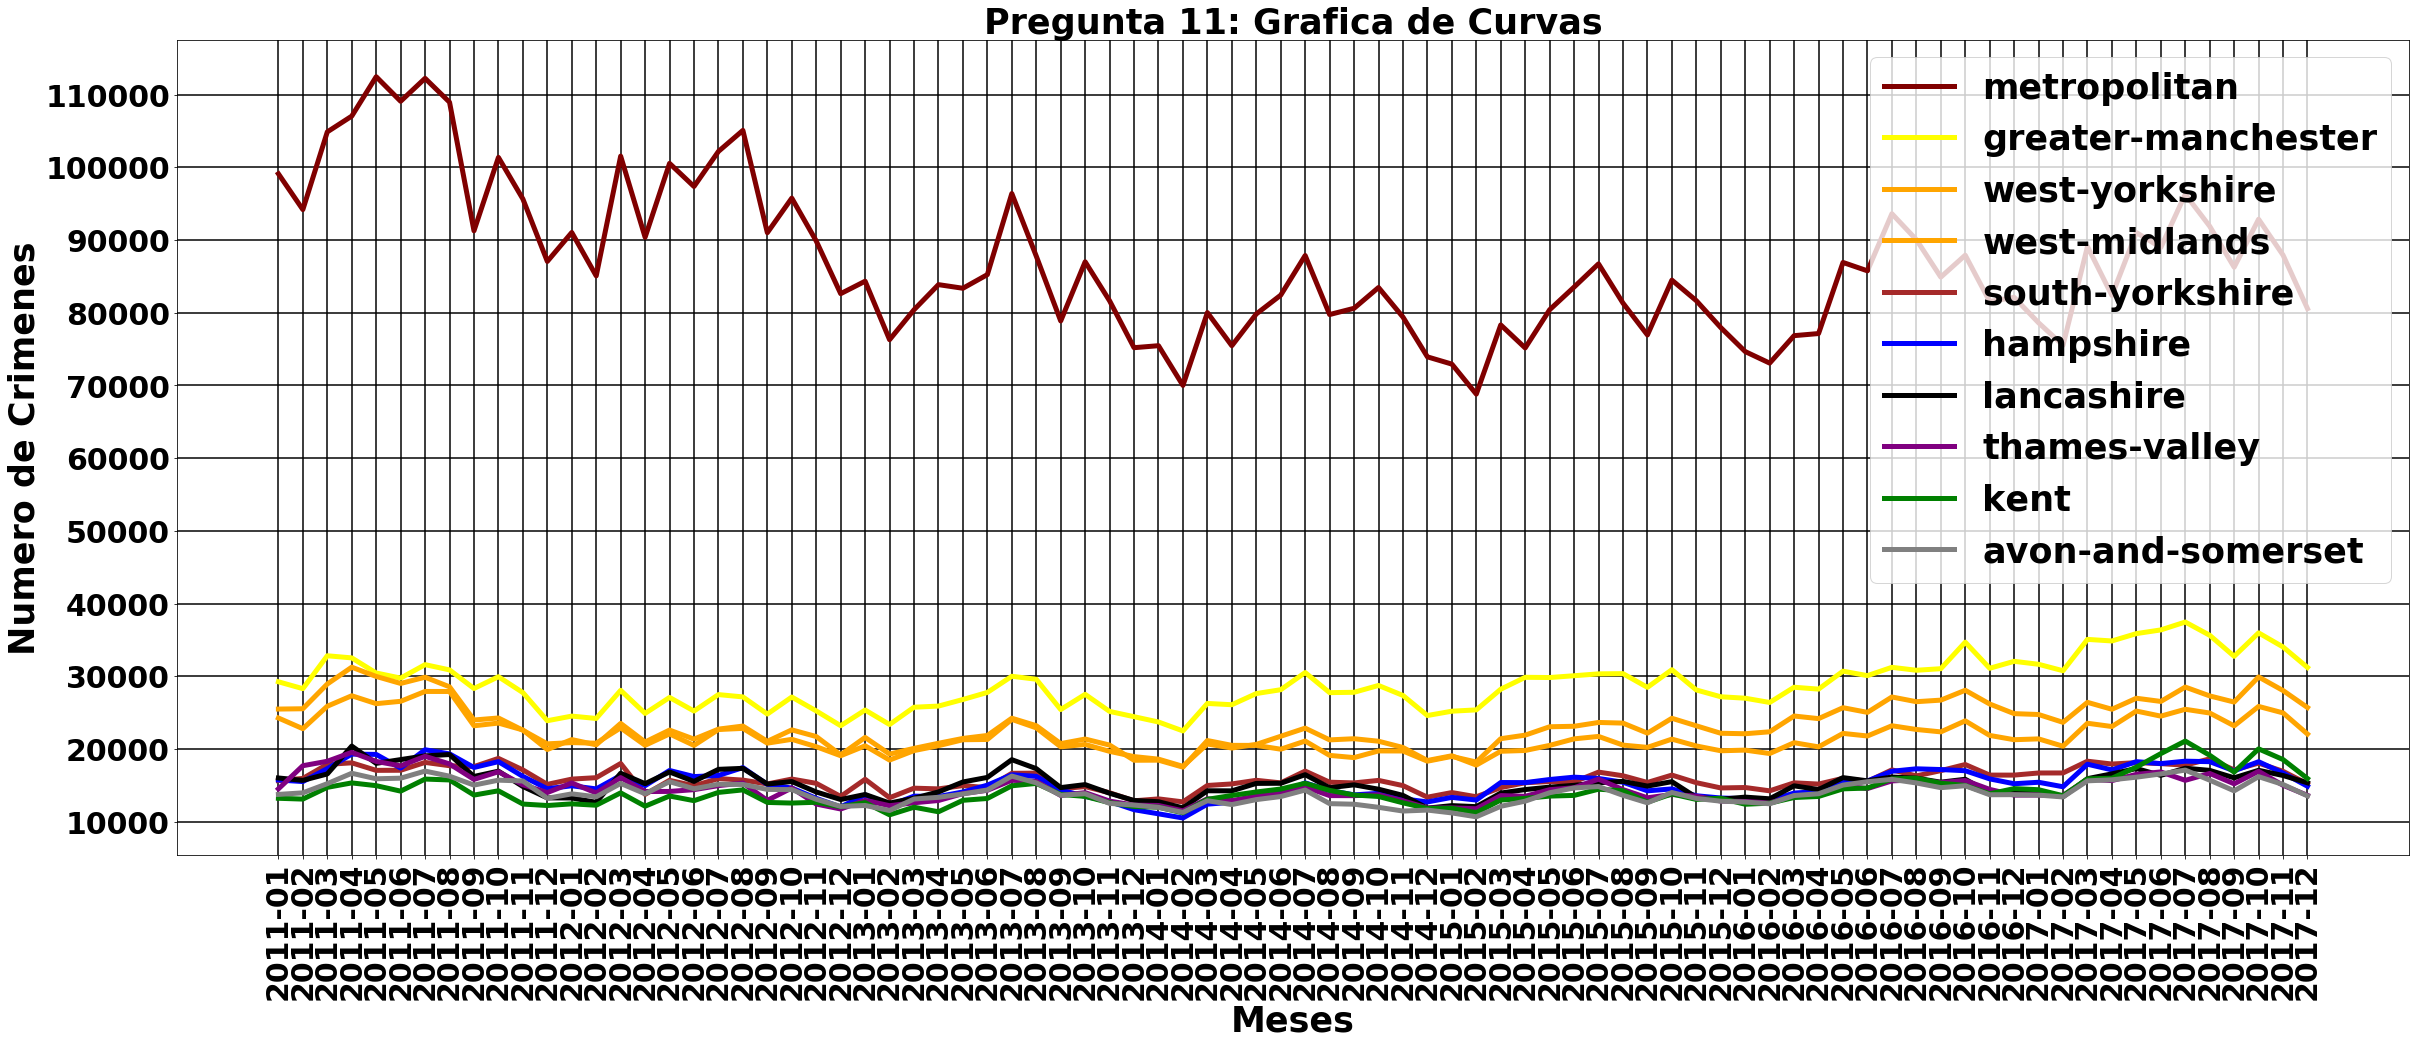

In [9]:
#creamos la figura para mostrar la grafica de la pregunta 11
fig = plot.figure(figsize=(40,15))
ax = fig.add_subplot(111)

#lista para guardar las etiquetas del eje x 
x_labels = []

#ciclos para obtener las etiquetas para el eje x
for i in ["2011-","2012-","2013-","2014-","2015-","2016-","2017-"]:
    for j in ["01","02","03","04","05","06","07","08","09","10","11","12"]:
        x_labels.append(i+j)

#asignamos los titulos de la figura y de los ejes x y y
plot.xlabel("Meses",fontsize=35,fontweight="bold")
plot.ylabel("Numero de Crimenes",fontsize=35,fontweight="bold")
plot.title("Pregunta 11: Grafica de Curvas",fontsize=35,fontweight="bold")

#activamos la cuadricula de la grafica
plot.grid(True,color="black",linewidth=1.5)

#contamos el numero de puntos que la linea tendra
numLines = range(len(x_labels))

#asignamos la posicion y las etiquetas de los ejes x y y
plot.xticks(numLines,x_labels,fontsize=30,fontweight="bold")
plot.setp(ax.get_xticklabels(), rotation=90)
plot.yticks([0,1e4,2e4,3e4,4e4,5e4,6e4,7e4,8e4,9e4,10e4,11e4],fontsize=30,fontweight="bold")

#graficamos las curvas en la grafica
colors = ["maroon","yellow","orange","orange","brown","blue","black","purple","green","gray","red"]
for i in range(len(topForcesCrimes)):
    plot.plot(numLines, topForcesCrimes[i], '-',color=colors[i],linewidth=5)

#ponemos la leyenda de la grafica
plot.legend(topForces,prop = {"size":35,"weight":"bold"}, loc = 1)

#mostramos la grafica
plot.show()

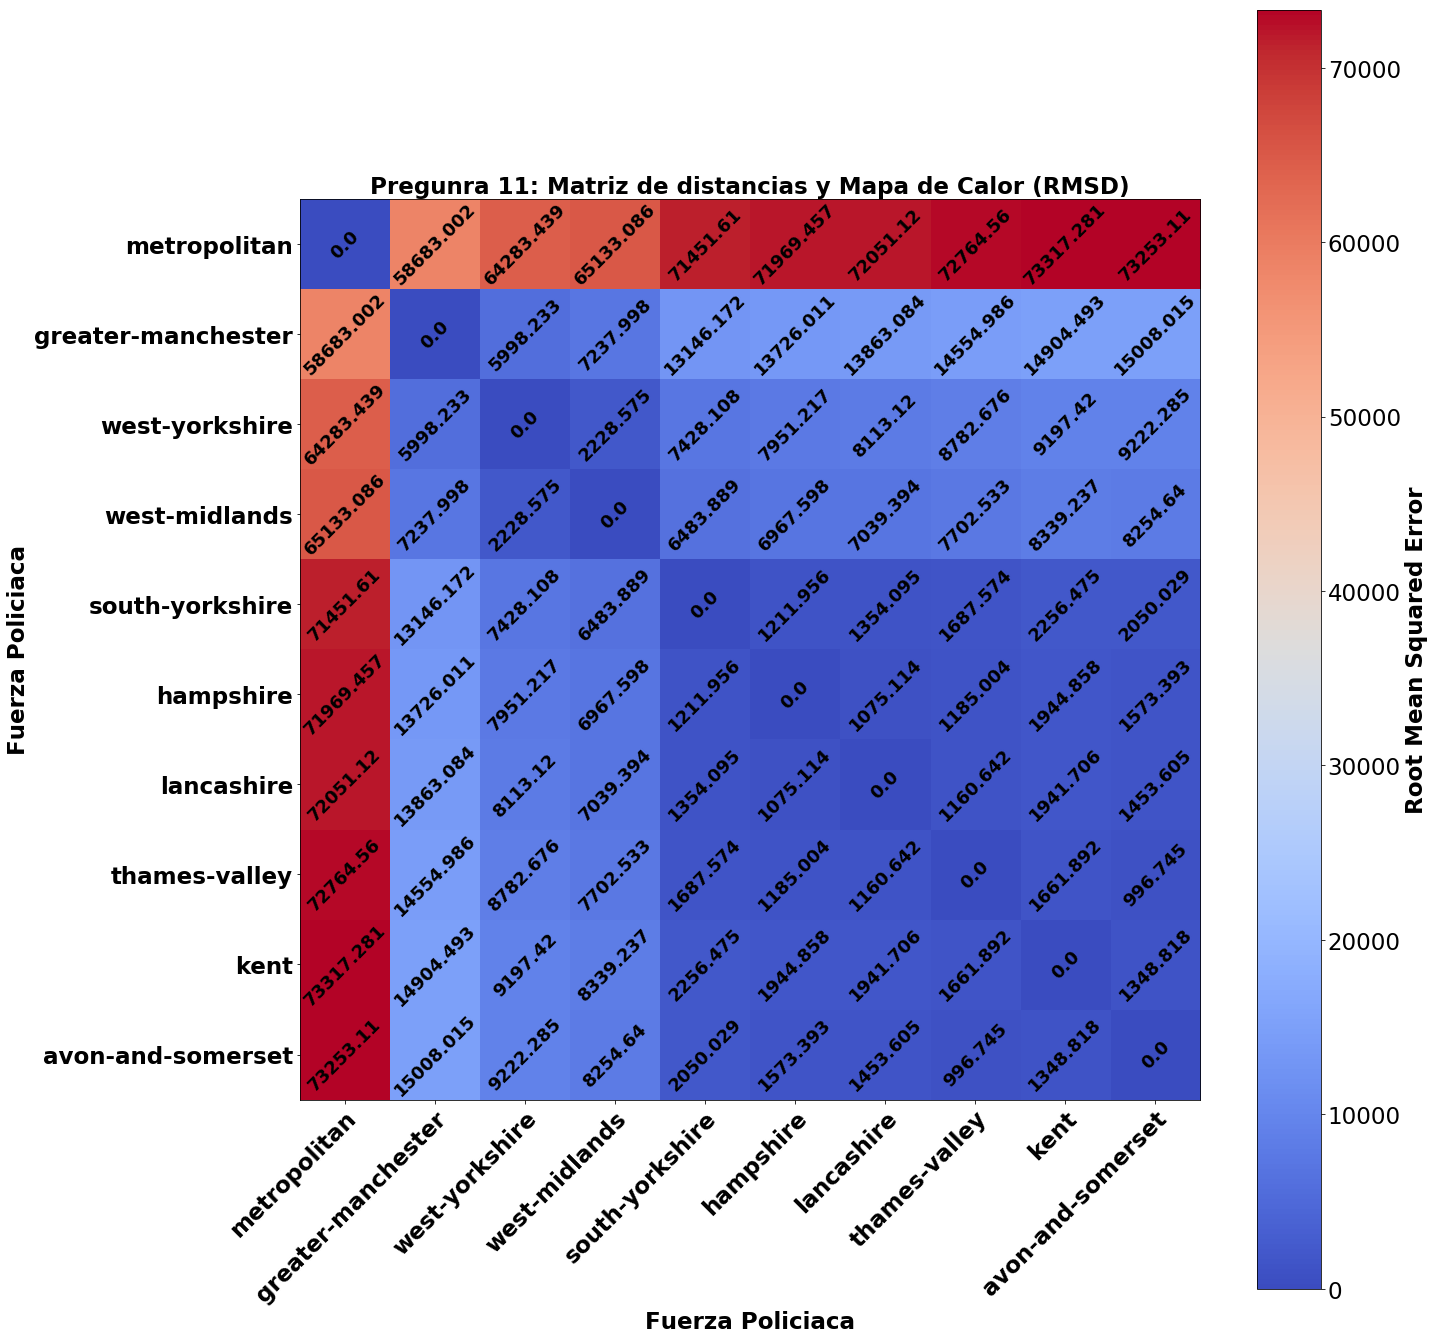

In [7]:
#matriz para guardar el RMSD de la grafica de distancias
Q11 = [0] * len(topForces)
for i in range(len(topForces)):
    Q11[i] = [0] * len(topForces)

#ciclos para obtener el RMSD de todas las lines contra todas las curvas
for i in range(len(Q11)):
    for j in range(len(Q11)):
        rmse = sqrt(mean_squared_error(topForcesCrimes[i], topForcesCrimes[j]))
        Q11[i][j] = rmse

#creamos la figura para mostrar el mapa de calor y la matriz de distancia de la pregunta 11
fig = plot.figure(figsize=(20,20))
ax = fig.add_subplot(111)

#creamos el mapa de calor
heatmap = ax.imshow(Q11)

#asignamos el estilo a mostrar el mapa de calor
plot.set_cmap("coolwarm")

#asignamos la posiciones y las etiquetas de los ejes x y y
ax.set_xticks(range(len(topForces)))
ax.set_yticks(range(len(topForces)))
ax.set_xticklabels(topForces,fontsize=23,fontweight="bold")
ax.set_yticklabels(topForces,fontsize=23,fontweight="bold")
plot.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

#asignamos los titulos de los ejes y de la figura
plot.xlabel("Fuerza Policiaca",fontsize=23,fontweight="bold")
plot.ylabel("Fuerza Policiaca",fontsize=23,fontweight="bold")
plot.title("Pregunra 11: Matriz de distancias y Mapa de Calor (RMSD)",fontsize=23,fontweight="bold")

#asignamos el RMSD en su correspondiente celda del mapa de calor
for i in range(len(topForces)):
    for j in range(len(topForces)):
        text = ax.text(j, i, round((Q11[i][j]),3),ha="center", rotation=45, va="center", color="black",fontsize=18,fontweight="bold")

#configuramos la barra de referencia del mapa de calor
cb = plot.colorbar(heatmap) 
cb.set_label("Root Mean Squared Error",weight='bold',size=23)
cb.ax.tick_params(labelsize=23)
fig.tight_layout()

#mostramos la figura
plot.show()

# Grafica Pregunta 12

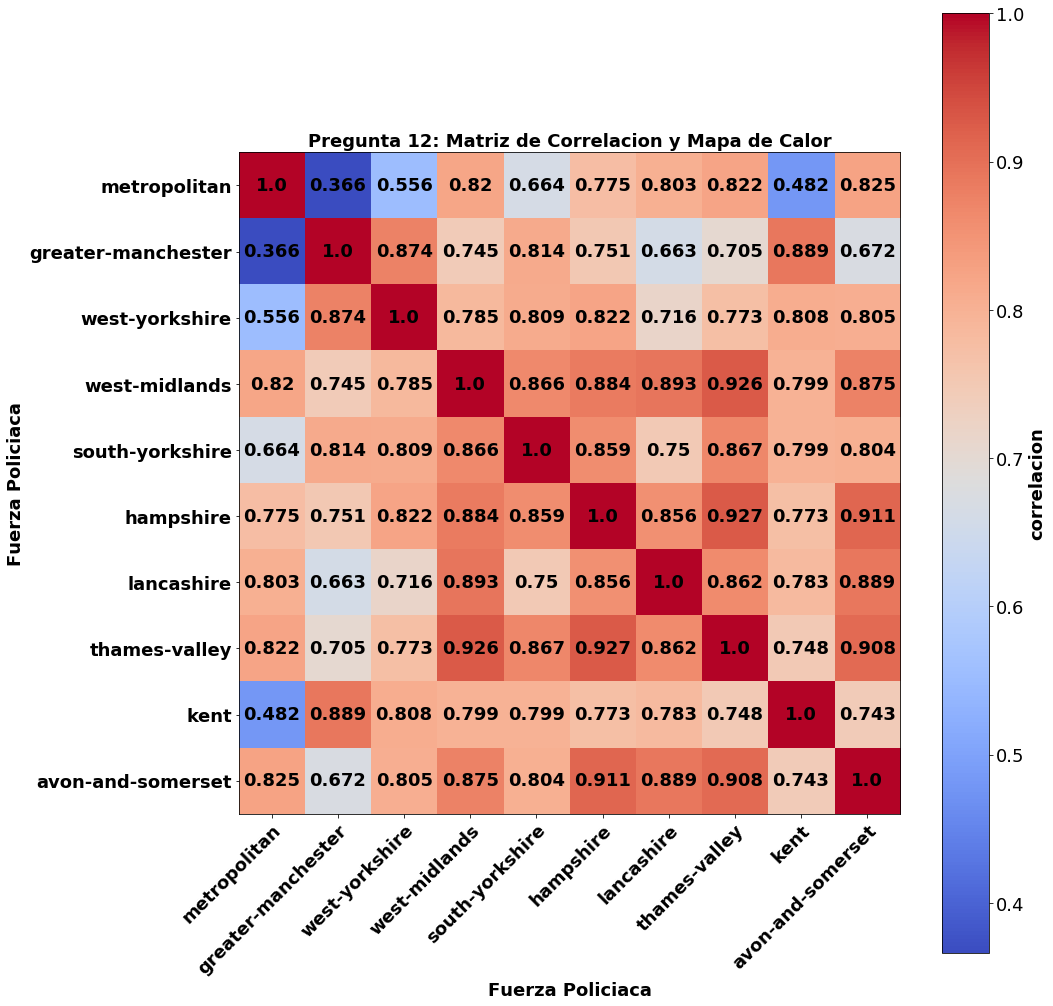

In [11]:
#matriz para guardar el valor de spearman para la matiz de correlacion
matrix = [0] * len(topForces)
for i in range(len(topForces)):
    matrix[i] = [0] * len(topForces)

#ciclos para obtener el valor de spearman de todas las lines contra todas las curvas
for i in range(len(matrix)):
    for j in range(len(matrix)):
        cor, pv = spearmanr(topForcesCrimes[i], topForcesCrimes[j])
        matrix[i][j] = cor

    
#creamos la figura para mostrar el mapa de calor de la pregunta 12
fig = plot.figure(figsize=(15,15))
ax = fig.add_subplot(111)

#creamos el mapa de calor
heatmap = ax.imshow(matrix)

#asignamos el estilo a mostrar el mapa de calor 
plot.set_cmap("coolwarm")

#asignamos la posicion y la etiqueta de los ejes x y y
ax.set_xticks(range(len(topForces)))
ax.set_yticks(range(len(topForces)))
ax.set_xticklabels(topForces,fontsize=18,fontweight="bold")
ax.set_yticklabels(topForces,fontsize=18,fontweight="bold")
plot.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")

#asignamos los titulos de la figura y los ejes
plot.title("Pregunta 12: Matriz de Correlacion y Mapa de Calor",fontsize=18,fontweight="bold")
plot.xlabel("Fuerza Policiaca",fontsize=18,fontweight="bold")
plot.ylabel("Fuerza Policiaca",fontsize=18,fontweight="bold")

#asignamos la correlacion de spearman en su correspondiente celda del mapa de calor
for i in range(len(topForces)):
    for j in range(len(topForces)):
        text = ax.text(j, i, round((matrix[i][j]),3),ha="center", va="center", color="black",fontsize=18,fontweight="bold")

#configuramos la barra de referencia del mapa de calor
cb = plot.colorbar(heatmap)
cb.set_label("correlacion",weight='bold',size=18)
cb.ax.tick_params(labelsize=18)
fig.tight_layout()

#mostramos la figura
plot.show()